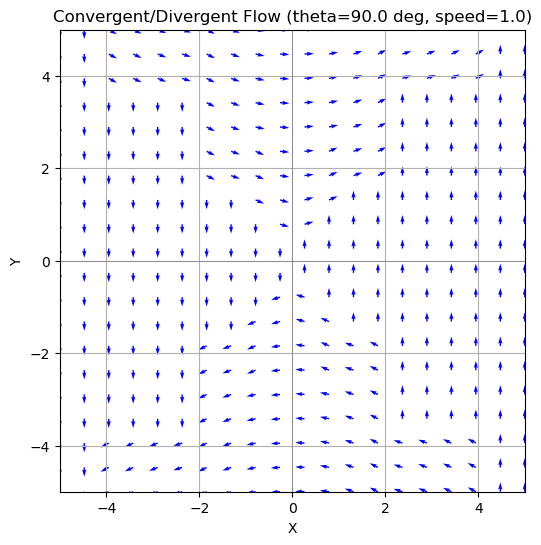

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def partial_tilt_saddle_flow(x, y, theta=0.0, c=1.0):
    """
    한 축(x축)은 그대로 두고, 다른 축(y축)만 theta만큼 기울여
    saddle(쌍곡) 형태의 흐름을 만들되, 모든 지점에서 속도 크기 = c.
    
    - 확장 축(e_expand) : (1, 0)    (x축)
    - 수축 축(e_contract): R_theta*(0, 1) = (-sin theta, cos theta)
      (단, theta > 0 이면 (0,1)을 반시계 방향으로 theta 회전)
    - raw velocity = p_expand * e_expand - p_contract * e_contract
    - 속도 크기는 c로 정규화.
    """
    
    # 1) 확장 축, 수축 축 정의
    e_expand = np.array([1.0, 0.0])  # (1, 0)
    e_contract = np.array([-np.sin(theta), np.cos(theta)])  # (0, 1)을 theta만큼 회전
    
    # 2) x, y가 meshgrid 형태라면, 각각 동일 위치(shape)의 2D array
    #    점마다 projection을 구해야 하므로 flatten 후 연산 -> reshape 과정을 거침
    x_flat = x.flatten()
    y_flat = y.flatten()
    
    # 3) projection (내적)
    #    p_expand    = x
    #    p_contract  = x*(-sin(theta)) + y*cos(theta)
    p_expand = x_flat  # dot((x,y), (1,0)) = x
    p_contract = x_flat*(-np.sin(theta)) + y_flat*(np.cos(theta))

    # 4) raw velocity = p_expand * e_expand - p_contract * e_contract
    v_raw = np.vstack([
        p_expand * e_expand[0] - p_contract * e_contract[0],
        p_expand * e_expand[1] - p_contract * e_contract[1],
    ])  # shape: (2, n_points)

    # 5) 각 점에서의 속도 크기
    norms = np.sqrt(v_raw[0]**2 + v_raw[1]**2)

    # 6) norms == 0 인 지점(특이점)은 속도를 (0,0)으로
    zero_mask = (norms == 0)
    norms[zero_mask] = 1e-12  # 분모 0 방지

    # 7) 크기 정규화 후, c를 곱해 최종 속도
    v_normalized = (v_raw / norms) * c

    # 8) 특이점(원점 등) 보정
    v_normalized[0, zero_mask] = 0.0
    v_normalized[1, zero_mask] = 0.0

    # 9) 원래 meshgrid shape로 복원
    vx = v_normalized[0].reshape(x.shape)
    vy = v_normalized[1].reshape(x.shape)
    
    return vx, vy


#---------------------------------
# 예시: 시각화
#---------------------------------
if __name__ == "__main__":
    # 격자 생성
    x_min, x_max = -5, 5
    y_min, y_max = -5, 5
    gap = 1
    n_points = 20
    x_vals = np.linspace(x_min, x_max, n_points)
    y_vals = np.linspace(y_min, y_max, n_points)
    x_0 = np.linspace(x_min, x_max, n_points)
    y_0 = np.linspace(y_min+gap, y_max+gap, n_points)
    X, Y = np.meshgrid(x_vals, y_vals)
    X0, Y0 = np.meshgrid(x_0, y_0)


    # 파라미터 설정
    c = 1.0          # 모든 지점에서의 속도 크기
    theta = np.radians(90)  # 30도 기울인 흐름

    # 속도장 계산
    VX, VY = partial_tilt_saddle_flow(X, Y, theta=theta, c=c)
    VX0, VY0 = partial_tilt_saddle_flow(X0, Y0, theta=theta, c=c)

    # 시각화
    plt.figure(figsize=(6,6))
    # plt.quiver(X, Y, VX - VX0, VY - VY0, color='blue', angles='xy', scale_units='xy',
    plt.quiver(X, Y, VX, VY, color='blue', angles='xy', scale_units='xy',
               scale=5)  # scale 파라미터는 화살표가 겹치지 않도록 조정

    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f"Convergent/Divergent Flow (theta={np.degrees(theta)} deg, speed={c})")
    plt.grid(True)
    plt.show()


[[-0.49780697 -0.47425346 -0.44994465 -0.42557457 -0.4018615  -0.37951189
  -0.35917448 -0.3413923  -0.32656244 -0.31491167 -0.30649287 -0.30120159
  -0.29880773 -0.2989947  -0.30139884 -0.30564349 -0.3113649  -0.31822941
  -0.32594296 -0.33425455]
 [-0.53574453 -0.5098977  -0.48216731 -0.45348134 -0.42486063 -0.39737417
  -0.37206251 -0.34984203 -0.33141186 -0.31718844 -0.30728464 -0.30153653
  -0.29956606 -0.30086012 -0.3048471  -0.31095842 -0.31867008 -0.32752557
  -0.33714394 -0.34721824]
 [-0.58364047 -0.55667718 -0.52586726 -0.49238583 -0.4576275  -0.42319042
  -0.39077465 -0.36200004 -0.338186   -0.32016465 -0.30819461 -0.3020007
  -0.30091191 -0.30403906 -0.31043671 -0.31921866 -0.32962163 -0.34102765
  -0.35295975 -0.3650642 ]
 [-0.64230104 -0.61757263 -0.58567369 -0.54796802 -0.50617098 -0.46251003
  -0.41971423 -0.38074854 -0.34830739 -0.32424712 -0.30922999 -0.30275082
  -0.30348743 -0.30976165 -0.31991795 -0.33254124 -0.34653228 -0.36109497
  -0.37568459 -0.38994796]
 [-0.

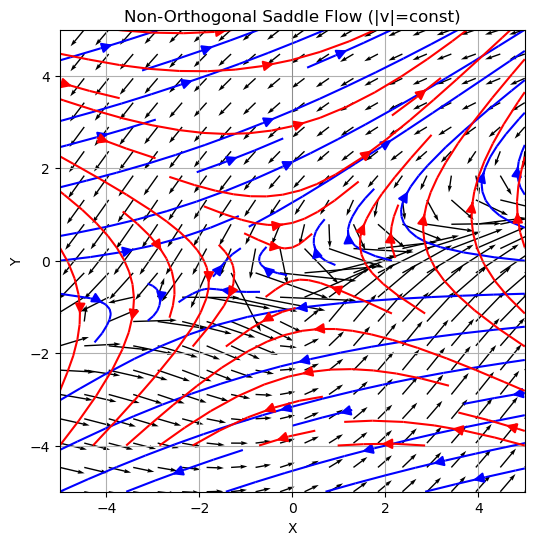

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def non_orthogonal_saddle_flow_translated(x, y, e1, e2, c=1.0, center=(0.0, 0.0)):
    """
    e1, e2로 정의된 쌍곡 흐름(한 축은 +, 한 축은 -)을
    center=(cx, cy)로 평행 이동.
    즉, 원점을 center로 보고 싶을 때 사용.
    """
    cx, cy = center

    # (X - cx, Y - cy)를 변환
    # -- 1) 먼저 p' = (X - cx, Y - cy)
    # -- 2) v_raw = M p'   (M은 e1, e2 기반)
    # -- 3) 정규화 후 c 곱하기
    # => 이 과정을 코드로 구현
    import numpy as np

    # e1, e2를 열벡터로 갖는 P 구성
    P = np.column_stack((e1, e2))
    detP = np.linalg.det(P)
    if abs(detP) < 1e-12:
        raise ValueError("e1, e2가 선형독립이 아닙니다.")

    D = np.diag([1.0, -1.0])  # 고유값 +1, -1
    P_inv = np.linalg.inv(P)
    M = P @ D @ P_inv

    # 평행 이동 좌표 (p')
    x_flat = (x - cx).ravel()
    y_flat = (y - cy).ravel()
    pts_prime = np.vstack([x_flat, y_flat])  # shape = (2, N)

    # raw velocity
    v_raw = M @ pts_prime  # (2, N)

    # 속도 크기
    norms = np.sqrt(v_raw[0]**2 + v_raw[1]**2)
    zero_mask = (norms == 0)
    norms[zero_mask] = 1e-12

    v_normalized = (v_raw / norms) * c
    v_normalized[0, zero_mask] = 0.0
    v_normalized[1, zero_mask] = 0.0

    VX = v_normalized[0].reshape(x.shape)
    VY = v_normalized[1].reshape(x.shape)
    return VX, VY

#---------------------------------------------
# 사용 예시
#---------------------------------------------
if __name__ == "__main__":
    # 1) 임의의 e1, e2 정의 (서로 수직이 아니도록)
    #    예: e1 = (1,  1), e2 = (2, -1)
    #    -> 두 벡터는 평행도 아니고, 수직도 아님.
    e1 = np.array([1.0, 1.0])   # 확장 방향
    e2 = np.array([-1.0, 0.0])  # 수축 방향

    # 2) 격자생성
    x_min, x_max = -5, 5
    y_min, y_max = -5, 5
    n_points = 20
    x_vals = np.linspace(x_min, x_max, n_points)
    y_vals = np.linspace(y_min, y_max, n_points)
    X, Y = np.meshgrid(x_vals, y_vals)

    # 3) 속도장 계산
    c = 1.0  # 모든 지점에서의 속도 크기
    VX, VY = non_orthogonal_saddle_flow_translated(X, Y, np.array([1.0, 0.7]), np.array([-1.0, 0.0]), c=c, center=(-2, -0.5))
    VX0, VY0 = non_orthogonal_saddle_flow_translated(X, Y, np.array([1.0, 1.0]), np.array([-1.0, 0.5]), c=c/3*2, center=(0, -1))

    # 4) 시각화
    plt.figure(figsize=(6,6))
    plt.streamplot(X, Y, VX, VY, color = 'blue', density=.5, linewidth=1.5, arrowsize=1.5)
    plt.streamplot(X0, Y0, VX0, VY0, color = 'red', density=.5, linewidth=1.5, arrowsize=1.5)
    plt.quiver(X, Y, VX0-VX, VY0-VY, color='black', angles='xy', scale_units='xy', scale = 1)
    print(VX - VX0)
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title("Non-Orthogonal Saddle Flow (|v|=const)")
    plt.grid(True)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

    # 격자 생성
    # x_min, x_max = -5, 5
    # y_min, y_max = -5, 5
    # gap = 1
    # n_points = 20
    # x_vals = np.linspace(x_min, x_max, n_points)
    # y_vals = np.linspace(y_min, y_max, n_points)
    # x_0 = np.linspace(x_min, x_max, n_points)
    # y_0 = np.linspace(y_min+gap, y_max+gap, n_points)
    # X, Y = np.meshgrid(x_vals, y_vals)
    # X0, Y0 = np.meshgrid(x_0, y_0)


    # # 파라미터 설정
    # c = 1.0          # 모든 지점에서의 속도 크기
    # theta = np.radians(90)  # 30도 기울인 흐름

    # # 속도장 계산
    # VX, VY = partial_tilt_saddle_flow(X, Y, theta=theta, c=c)
    # VX0, VY0 = partial_tilt_saddle_flow(X0, Y0, theta=theta, c=c)

    # # 시각화
    # plt.figure(figsize=(6,6))
    # # plt.quiver(X, Y, VX - VX0, VY - VY0, color='blue', angles='xy', scale_units='xy',
    # plt.quiver(X, Y, VX, VY, color='blue', angles='xy', scale_units='xy',
    #            scale=5)  # scale 파라미터는 화살표가 겹치지 않도록 조정

    # plt.axhline(0, color='gray', linewidth=0.5)
    # plt.axvline(0, color='gray', linewidth=0.5)

    # plt.xlim(x_min, x_max)
    # plt.ylim(y_min, y_max)
    # plt.xlabel('X')
    # plt.ylabel('Y')
    # plt.title(f"Convergent/Divergent Flow (theta={np.degrees(theta)} deg, speed={c})")
    # plt.grid(True)
    # plt.show()


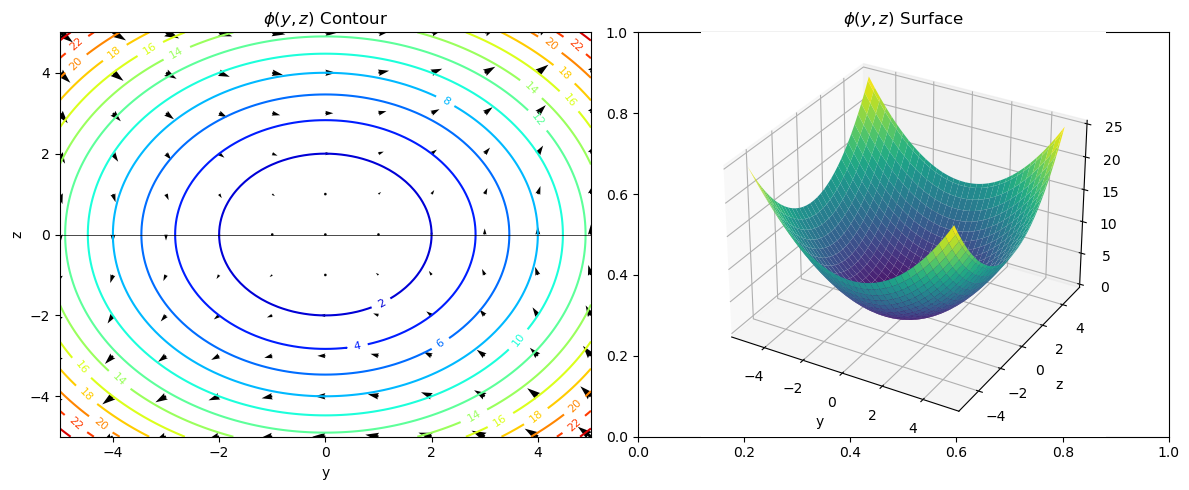

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# === 파라미터 설정 ===
N = 1.0   # 예시로 1
f = 1.0   # 예시로 1
A = 1.0   # 오른쪽 항 상수 (양의 값)

# y, z 범위와 격자 정의
ymin, ymax, Ny = -5, 5, 101
zmin, zmax, Nz = -5, 5, 101

y_vals = np.linspace(ymin, ymax, Ny)
z_vals = np.linspace(zmin, zmax, Nz)

# 2D 격자를 만들기 위해 meshgrid 사용
Y, Z = np.meshgrid(y_vals, z_vals, indexing='xy')

# === 해(phi) 계산: phi(y,z) = A/(2N^2)*y^2 + A/(2f^2)*z^2 ===
phi = (A/(2*N**2)) * Y**2 + (A/(2*f**2)) * Z**2
y_grad = np.gradient(phi, axis=0)  # y 방향으로 gradient
z_grad = np.gradient(phi, axis=1)  # z 방향으로 gradient

# === 시각화 ===
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# (1) 등고선
cs = ax[0].contour(Y, Z, phi, levels=15, cmap='jet')
ax[0].clabel(cs, inline=True, fontsize=8)
ax[0].quiver(Y[::10,::10], Z[::10,::10], y_grad[::10,::10], z_grad[::10,::10], color='black', angles='xy', scale_units='xy', scale=2)
ax[0].set_title(r"$\phi(y,z)$ Contour")
ax[0].set_xlabel('y')
ax[0].set_ylabel('z')
ax[0].axhline(0, color='k', lw=0.5)  # z=0 선

# (2) 3D surface plot
from mpl_toolkits.mplot3d import Axes3D  # 필요 시 import
ax3d = fig.add_subplot(1, 2, 2, projection='3d')
ax3d.plot_surface(Y, Z, phi, cmap='viridis', edgecolor='none')
ax3d.set_title(r"$\phi(y,z)$ Surface")
ax3d.set_xlabel('y')
ax3d.set_ylabel('z')

plt.tight_layout()
plt.show()
